In [29]:
>>> pip install copia

Note: you may need to restart the kernel to use updated packages.


In [30]:
import copia

print(dir(copia))


['__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', 'abundance_barplot', 'abundance_histogram', 'accumulation_curve', 'ace', 'chao1', 'density_plot', 'diversity', 'egghe_proot', 'empirical_hill', 'empirical_richness', 'estimated_hill', 'estimators', 'evenness', 'evenness_plot', 'functional_attribute_diversity', 'hill_numbers', 'hill_plot', 'iChao1', 'jackknife', 'min_add_sample', 'minsample_diagnostic_plot', 'multi_kde_plot', 'plot', 'shared_richness', 'stats', 'survival_errorbar', 'utils']


this is the result from colab: ['__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', 'abundance_counts', 'abundance_histogram', 'accumulation_curve', 'ace', 'chao1', 'density', 'diversity', 'egghe_proot', 'empirical_richness', 'evenness_plot', 'hill', 'hill_plot', 'iChao1', 'jackknife', 'min_add_sample', 'minsample_diagnostic_plot', 'multi_kde', 'plot', 'richness', 'species_accumulation', 'stats', 'survival_errorbar', 'utils']

In [31]:
import glob
import os

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
np.random.seed(543251) # control random seed

import copia.utils as u
from copia.estimators import *
from copia import hill_numbers
from copia.stats import survival_ratio
from copia.diversity import evenness
from copia.plot import accumulation_curve
from copia.plot import multi_kde_plot
from copia.plot import survival_errorbar
from copia.plot import evenness_plot
from copia.plot import density_plot
from copia.plot import hill_plot


plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
plt.rcParams['xtick.top'] = False
plt.rcParams['ytick.right'] = False
plt.rcParams['ytick.minor.left'] = False

读取文件: /Users/josiechen/desktop/full data/Bahasa_Indonesia_df_fulldata.csv
读取文件: /Users/josiechen/desktop/full data/Português_brasileiro_df_fulldata.csv
读取文件: /Users/josiechen/desktop/full data/chinese_df_full data.csv
读取文件: /Users/josiechen/desktop/full data/english_df_full data.csv
读取文件: /Users/josiechen/desktop/full data/spain_df_full data.csv
    work_id         language  \
0  36657928  bahasaindonesia   
1  39800361  bahasaindonesia   
2  38560521  bahasaindonesia   
3  33877852  bahasaindonesia   
4  34639120  bahasaindonesia   

                                            username  
0  ['dianthus_peony', 'Reyan3779', 'CuddlyWorm', ...  
1  ['desirely', 'yukiko_junko', 'koobiers', 'agus...  
2  ['jiewyve', 'jeonfm', 'amoon93', 'chimchick13'...  
3  ['jinniesyubbie', 'Kopiahge', 'Seokjinieyoongi...  
4  ['pinkmakaroni', 'seductivekv', 'urtaeguk', 'T...  


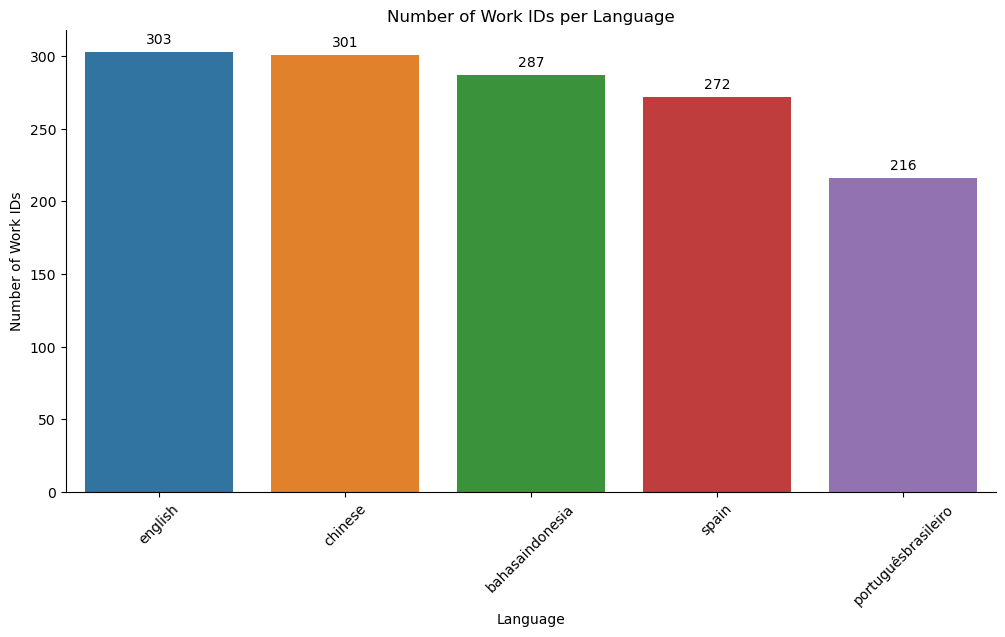

In [32]:
import pandas as pd
import glob
import os
import matplotlib.pyplot as plt
import seaborn as sns


all_data = []


for fn in sorted(glob.glob('/Users/josiechen/desktop/full data/*.csv')):
 
    df = pd.read_csv(fn)
  
    print(f"读取文件: {fn}")
    

    lang = os.path.basename(fn).replace('df_fulldata.csv', '').replace('.csv', '').replace('full data', '').replace('_', '').lower().replace('df', '')
  
    df['language'] = lang.strip()
    

    all_data.append(df)


all_data_df = pd.concat(all_data, ignore_index=True)


print(all_data_df.head())


language_work_id_counts = all_data_df.groupby('language')['work_id'].count().reset_index()
language_work_id_counts.columns = ['language', 'work_id_count']

plt.figure(figsize=(12, 6))
barplot = sns.barplot(data=language_work_id_counts, x='language', y='work_id_count', order=language_work_id_counts.sort_values('work_id_count', ascending=False)['language'])
plt.title('Number of Work IDs per Language')
plt.xlabel('Language')
plt.ylabel('Number of Work IDs')
plt.xticks(rotation=45)


for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.0f'), 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha = 'center', va = 'center', 
                     xytext = (0, 9), 
                     textcoords = 'offset points')

plt.show()


In [33]:
import pandas as pd
import glob
import os
import matplotlib.pyplot as plt
import seaborn as sns


lits = {}


for fn in sorted(glob.glob('/Users/josiechen/desktop/prepared data/*.csv')):

    if 'anglo-norman' in fn:
        continue
    

    df = pd.read_csv(fn)
    

    lang = os.path.basename(fn).replace('prepared data_', '').replace('.csv', '').lower()

    lits[lang] = df[['username', 'language', 'work_id']]

for lang, data in lits.items():
    print(f"Language: {lang}")
    print(data.head())

all_data = pd.concat(lits.values(), ignore_index=True)

print(all_data.head())




Language: bahasa_indonesia
          username          language   work_id
0   dianthus_peony  Bahasa Indonesia  36657928
1        Reyan3779  Bahasa Indonesia  36657928
2       CuddlyWorm  Bahasa Indonesia  36657928
3  jinkook_married  Bahasa Indonesia  36657928
4      agustDRkive  Bahasa Indonesia  36657928
Language: português_brasileiro
    username              language   work_id
0   nic_ckie  Português brasileiro  35195854
1   KimIsa15  Português brasileiro  32475397
2  velezhard  Português brasileiro  32475397
3   bunny445  Português brasileiro  32475397
4    Lunnary  Português brasileiro  32475397
Language: chinese
            username language   work_id
0           xiaowwai  chinese  40244955
1         kwonorange  chinese  40244955
2              EM_WX  chinese  40244955
3  mintchocolatemint  chinese  40244955
4      aaaaaaa_aaaaa  chinese  40244955
Language: english
        username language   work_id
0      camote_24  english  39739578
1       AdaoraKi  english  39739578
2  end

In [34]:

def to_abundance(series):

    return series.value_counts().to_dict()

def basic_stats(abundance):

    s = {
        'f1': sum(1 for count in abundance.values() if count == 1),
        'f2': sum(1 for count in abundance.values() if count == 2),
        'S': len(abundance),
        'n': sum(abundance.values())
    }
    return s


stats = []
for lit, df in lits.items():
    abundance = to_abundance(df['work_id'])
    s = basic_stats(abundance)
    d = {'language': lit}
    for k in ('f1', 'f2', 'S', 'n'):
        d[k] = s[k]
    d['repo'] = len(set(df['username']))
    stats.append(d)

print(stats)


[{'language': 'bahasa_indonesia', 'f1': 34, 'f2': 31, 'S': 287, 'n': 3505, 'repo': 1398}, {'language': 'português_brasileiro', 'f1': 79, 'f2': 47, 'S': 216, 'n': 871, 'repo': 589}, {'language': 'chinese', 'f1': 32, 'f2': 40, 'S': 301, 'n': 2371, 'repo': 885}, {'language': 'english', 'f1': 2, 'f2': 3, 'S': 303, 'n': 54772, 'repo': 32731}, {'language': 'spain', 'f1': 23, 'f2': 36, 'S': 272, 'n': 3759, 'repo': 2389}]


In [35]:

stats_df = pd.DataFrame(stats)


stats_df['language'] = stats_df['language'].str.lower()


total_row = ['all'] + list(stats_df[['f1', 'f2', 'S', 'n']].sum()) + [None]
stats_df.loc[len(stats_df)] = total_row

stats_df = stats_df.set_index('language')

print(stats_df)


                        f1   f2     S      n   repo
language                                           
bahasa_indonesia        34   31   287   3505   1398
português_brasileiro   79   47   216    871    589
chinese                 32   40   301   2371    885
english                  2    3   303  54772  32731
spain                   23   36   272   3759   2389
all                    170  157  1379  65278   None


               language   f1   f2     S     ratio
0      bahasa_indonesia   34   31   287  0.226481
1  português_brasileiro   79   47   216  0.583333
2               chinese   32   40   301  0.239203
3               english    2    3   303  0.016502
4                 spain   23   36   272  0.216912
5                   all  170  157  1379  0.237128


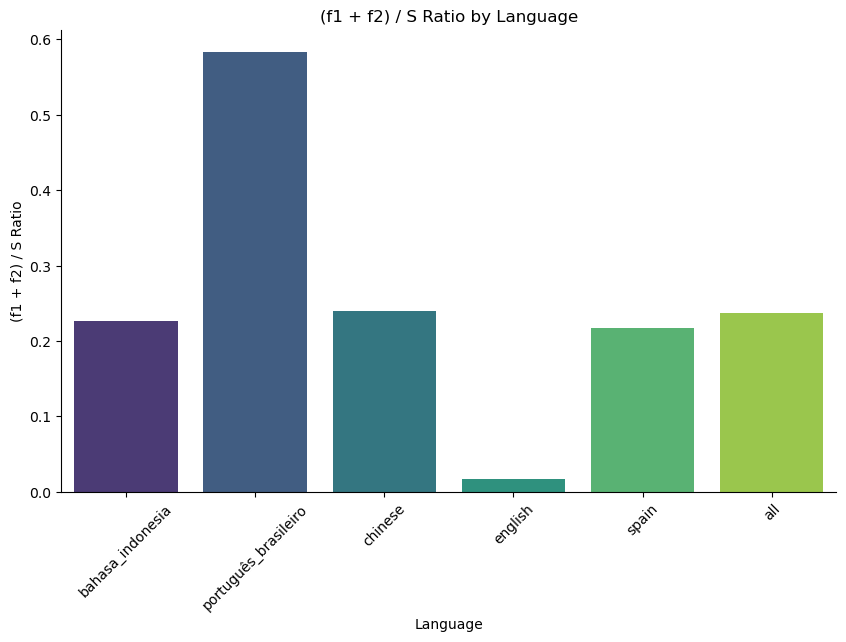

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


data = {
    'language': ['bahasa_indonesia', 'português_brasileiro', 'chinese', 'english', 'spain', 'all'],
    'f1': [34, 79, 32, 2, 23, 170],
    'f2': [31, 47, 40, 3, 36, 157],
    'S': [287, 216, 301, 303, 272, 1379],
    'n': [3505, 871, 2371, 54772, 3759, 65278]
}


df = pd.DataFrame(data)

df['ratio'] = (df['f1'] + df['f2']) / df['S']

print(df[['language', 'f1', 'f2', 'S', 'ratio']])

plt.figure(figsize=(10, 6))
sns.barplot(x='language', y='ratio', data=df, palette="viridis")
plt.xlabel('Language')
plt.ylabel('(f1 + f2) / S Ratio')
plt.title('(f1 + f2) / S Ratio by Language')
plt.xticks(rotation=45)
plt.show()


In [37]:
import pandas as pd
import glob
import os
import matplotlib.pyplot as plt
import seaborn as sns


all_data = []

for fn in sorted(glob.glob('/Users/josiechen/desktop/prepared data/*.csv')):

    if 'anglo-norman' in fn:
        continue

    df = pd.read_csv(fn)

    all_data.append(df[['username', 'language', 'work_id']])

combined_df = pd.concat(all_data, ignore_index=True)


user_lang_counts = combined_df.groupby('username')['language'].nunique()

lang_reading_stats = user_lang_counts.value_counts().sort_index()

for num_languages, num_users in lang_reading_stats.items():
    print(f"Number of users who can read {num_languages} language(s): {num_users}")


Number of users who can read 1 language(s): 34566
Number of users who can read 2 language(s): 1437
Number of users who can read 3 language(s): 155
Number of users who can read 4 language(s): 18
Number of users who can read 5 language(s): 3


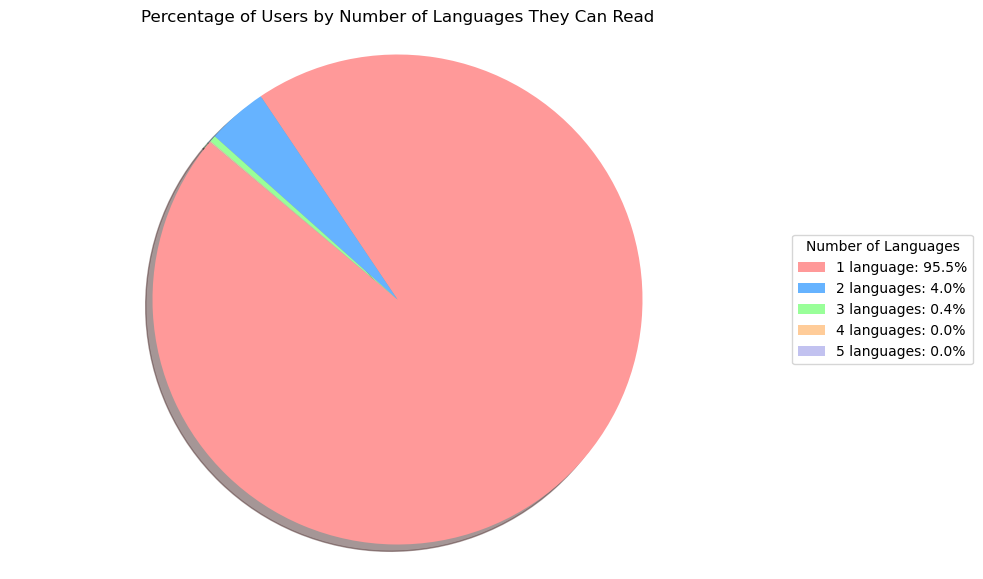

In [38]:
import matplotlib.pyplot as plt


labels = ['1 language', '2 languages', '3 languages', '4 languages', '5 languages']
sizes = [34566, 1437, 155, 18, 3]


colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0']

percentages = [size / sum(sizes) * 100 for size in sizes]

plt.figure(figsize=(10, 7))
wedges, texts = plt.pie(sizes, colors=colors, shadow=True, startangle=140, textprops=dict(color="w"))


legend_labels = [f'{label}: {percentage:.1f}%' for label, percentage in zip(labels, percentages)]

plt.legend(wedges, legend_labels, title="Number of Languages", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.title('Percentage of Users by Number of Languages They Can Read')

plt.axis('equal')  
plt.show()


Percentage of users who read English articles and also read other languages: 4.79%


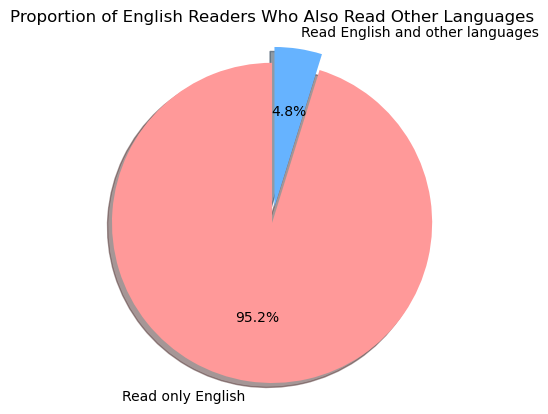

In [39]:
import pandas as pd
import glob
import os
import matplotlib.pyplot as plt
import seaborn as sns

lits = {}

for fn in sorted(glob.glob('/Users/josiechen/desktop/prepared data/*.csv')):

    if 'anglo-norman' in fn:
        continue

    df = pd.read_csv(fn)

    lang = os.path.basename(fn).replace('prepared data_', '').replace('.csv', '').lower()

    lits[lang] = df[['username', 'language', 'work_id']]

all_data = pd.concat(lits.values(), ignore_index=True)

user_lang_counts = all_data.groupby('username')['language'].nunique()

english_readers = all_data[all_data['language'] == 'english']['username'].unique()

other_lang_readers_count = user_lang_counts.loc[english_readers][user_lang_counts.loc[english_readers] > 1].count()
total_english_readers_count = len(english_readers)

other_lang_readers_percentage = (other_lang_readers_count / total_english_readers_count) * 100

print(f"Percentage of users who read English articles and also read other languages: {other_lang_readers_percentage:.2f}%")


labels = ['Read only English', 'Read English and other languages']
sizes = [100 - other_lang_readers_percentage, other_lang_readers_percentage]
colors = ['#ff9999','#66b3ff']
explode = (0.1, 0)  # only "explode" the 2nd slice

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title('Proportion of English Readers Who Also Read Other Languages')
plt.show()


Percentage of users who read English articles and also read other languages: 4.79%
Percentage of users who read Bahasa indonesia articles and also read other languages: 33.40%
Percentage of users who read Português brasileiro articles and also read other languages: 39.90%
Percentage of users who read Chinese articles and also read other languages: 15.59%
Percentage of users who read Spain articles and also read other languages: 42.57%


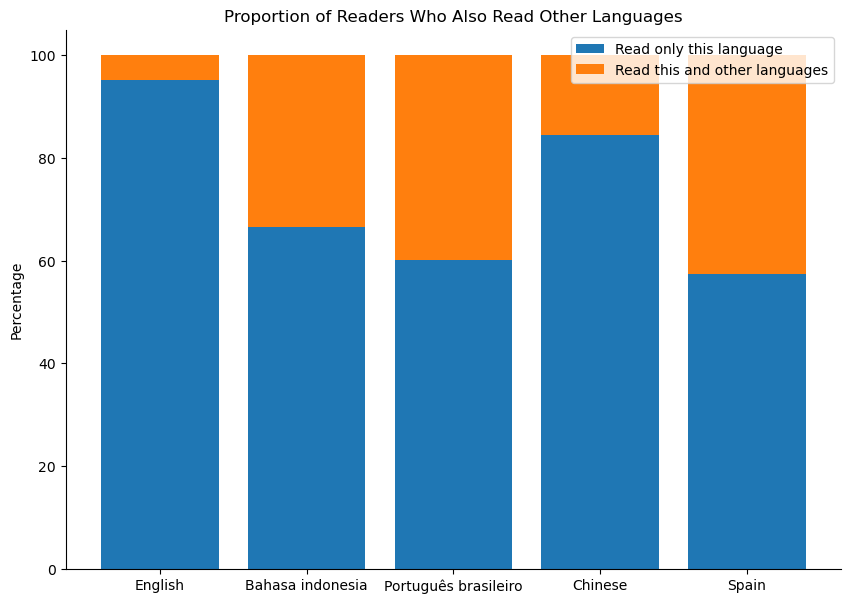

In [58]:
import pandas as pd
import glob
import os
import matplotlib.pyplot as plt
import seaborn as sns


lits = {}


for fn in sorted(glob.glob('/Users/josiechen/desktop/prepared data/*.csv')):

    if 'anglo-norman' in fn:
        continue

    df = pd.read_csv(fn)

    lang = os.path.basename(fn).replace('prepared data_', '').replace('.csv', '').lower()

    lits[lang] = df[['username', 'language', 'work_id']]

all_data = pd.concat(lits.values(), ignore_index=True)

user_lang_counts = all_data.groupby('username')['language'].nunique()

languages_of_interest = ['english', 'Bahasa Indonesia', 'Português brasileiro', 'chinese', 'spain']

language_proportions = {}

for lang in languages_of_interest:

    readers = all_data[all_data['language'] == lang]['username'].unique()

    other_lang_readers_count = user_lang_counts.loc[readers][user_lang_counts.loc[readers] > 1].count()
    total_readers_count = len(readers)

    other_lang_readers_percentage = (other_lang_readers_count / total_readers_count) * 100
    language_proportions[lang] = other_lang_readers_percentage

for lang, percentage in language_proportions.items():
    print(f"Percentage of users who read {lang.capitalize()} articles and also read other languages: {percentage:.2f}%")

labels = [lang.capitalize() for lang in languages_of_interest]
sizes = [100 - language_proportions[lang] for lang in languages_of_interest]
other_sizes = [language_proportions[lang] for lang in languages_of_interest]

fig, ax = plt.subplots(figsize=(10, 7))
ax.bar(labels, sizes, label='Read only this language')
ax.bar(labels, other_sizes, bottom=sizes, label='Read this and other languages')
ax.set_ylabel('Percentage')
ax.set_title('Proportion of Readers Who Also Read Other Languages')
ax.legend()

plt.show()


In [69]:
import pandas as pd
import glob
import os

lits = {}

for fn in sorted(glob.glob('/Users/josiechen/desktop/prepared data/*.csv')):

    if 'anglo-norman' in fn:
        continue

    df = pd.read_csv(fn)

    lang = os.path.basename(fn).replace('prepared data_', '').replace('.csv', '').lower()

    lits[lang] = df[['username', 'language', 'work_id']]

all_data = pd.concat(lits.values(), ignore_index=True)

user_lang_counts = all_data.groupby('username')['language'].nunique()

languages_of_interest = ['english', 'Bahasa Indonesia', 'Português brasileiro', 'chinese', 'spain']

language_proportions = {}

for lang in languages_of_interest:

    readers = all_data[all_data['language'] == lang]['username'].unique()

    other_lang_readers = all_data[(all_data['username'].isin(readers)) & (all_data['language'] != lang)]['username'].unique()
    other_lang_readers_count = user_lang_counts.loc[other_lang_readers][user_lang_counts.loc[other_lang_readers] > 1].count()
    total_readers_count = len(readers)

    if total_readers_count != 0:
        other_lang_readers_percentage = (other_lang_readers_count / total_readers_count) * 100
    else:
        other_lang_readers_percentage = 0
    
    language_proportions[lang] = other_lang_readers_percentage

# 输出结果
for lang, percentage in language_proportions.items():
    print(f"Percentage of users who read {lang.capitalize()} articles and also read other languages: {percentage:.2f}%")


Percentage of users who read English articles and also read other languages: 4.79%
Percentage of users who read Bahasa indonesia articles and also read other languages: 33.40%
Percentage of users who read Português brasileiro articles and also read other languages: 39.90%
Percentage of users who read Chinese articles and also read other languages: 15.59%
Percentage of users who read Spain articles and also read other languages: 42.57%


Percentage of Chinese readers who also read english: 14.12%
Percentage of Chinese readers who also read Bahasa Indonesia: 2.94%
Percentage of Chinese readers who also read Português brasileiro: 1.69%
Percentage of Chinese readers who also read spain: 4.29%


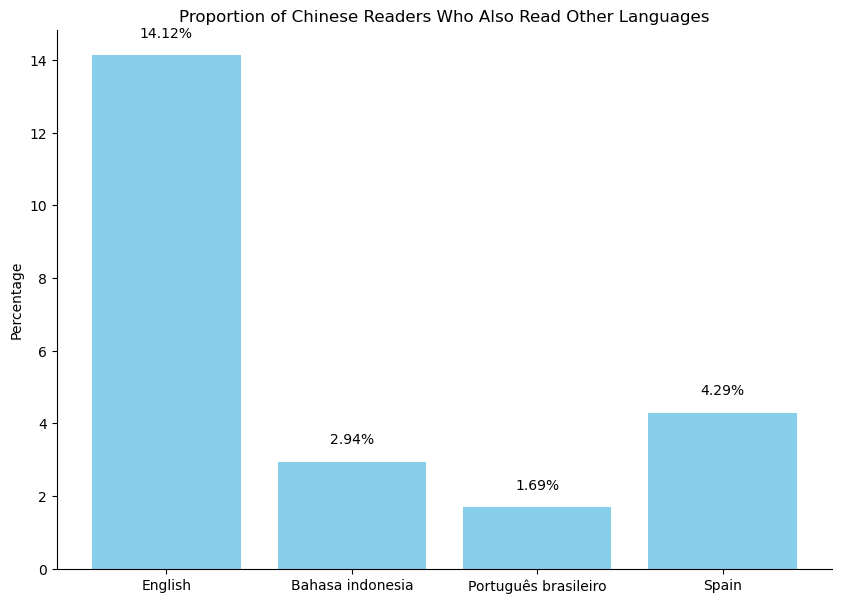

In [66]:
import pandas as pd
import glob
import os
import matplotlib.pyplot as plt

lits = {}

for fn in sorted(glob.glob('/Users/josiechen/desktop/prepared data/*.csv')):

    if 'anglo-norman' in fn:
        continue

    df = pd.read_csv(fn)
 
    lang = os.path.basename(fn).replace('prepared data_', '').replace('.csv', '').lower()

    lits[lang] = df[['username', 'language', 'work_id']]

all_data = pd.concat(lits.values(), ignore_index=True)

chinese_readers = all_data[all_data['language'] == 'chinese']['username'].unique()

chinese_reader_proportions = {}

other_languages = ['english', 'Bahasa Indonesia', 'Português brasileiro', 'spain']

for lang in other_languages:

    other_lang_readers = all_data[(all_data['username'].isin(chinese_readers)) & (all_data['language'] == lang)]['username'].unique()
    other_lang_readers_count = len(other_lang_readers)
    total_chinese_readers_count = len(chinese_readers)

    if total_chinese_readers_count != 0:
        other_lang_readers_percentage = (other_lang_readers_count / total_chinese_readers_count) * 100
    else:
        other_lang_readers_percentage = 0
    
    chinese_reader_proportions[lang] = other_lang_readers_percentage

for lang, percentage in chinese_reader_proportions.items():
    print(f"Percentage of Chinese readers who also read {lang}: {percentage:.2f}%")

labels = [lang.capitalize() for lang in other_languages]
sizes = [chinese_reader_proportions[lang] for lang in other_languages]

fig, ax = plt.subplots(figsize=(10, 7))
ax.bar(labels, sizes, color='skyblue')
ax.set_ylabel('Percentage')
ax.set_title('Proportion of Chinese Readers Who Also Read Other Languages')

for i in range(len(labels)):
    ax.text(i, sizes[i] + 0.5, f"{sizes[i]:.2f}%", ha='center')

plt.show()


Percentage of Spanish readers who also read English articles: 41.15%
Percentage of Spanish readers who also read Bahasa indonesia articles: 4.35%
Percentage of Spanish readers who also read Português brasileiro articles: 2.85%
Percentage of Spanish readers who also read Chinese articles: 1.59%


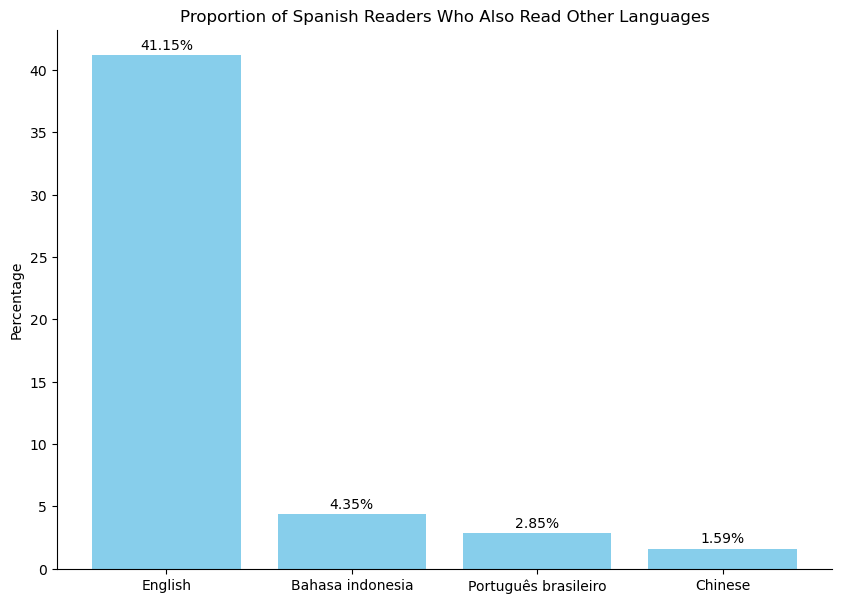

In [45]:
import pandas as pd
import glob
import os
import matplotlib.pyplot as plt

lits = {}

for fn in sorted(glob.glob('/Users/josiechen/desktop/prepared data/*.csv')):

    if 'anglo-norman' in fn:
        continue

    df = pd.read_csv(fn)

    lang = os.path.basename(fn).replace('prepared data_', '').replace('.csv', '').lower()

    lits[lang] = df[['username', 'language', 'work_id']]

all_data = pd.concat(lits.values(), ignore_index=True)

spanish_readers = all_data[all_data['language'] == 'spain']['username'].unique()

spanish_reader_proportions = {}

other_languages = ['english', 'Bahasa Indonesia', 'Português brasileiro', 'chinese']

for lang in other_languages:

    other_lang_readers = all_data[(all_data['username'].isin(spanish_readers)) & (all_data['language'] == lang)]['username'].unique()
    other_lang_readers_count = len(other_lang_readers)
    total_spanish_readers_count = len(spanish_readers)

    other_lang_readers_percentage = (other_lang_readers_count / total_spanish_readers_count) * 100
    spanish_reader_proportions[lang] = other_lang_readers_percentage

for lang, percentage in spanish_reader_proportions.items():
    print(f"Percentage of Spanish readers who also read {lang.capitalize()} articles: {percentage:.2f}%")

labels = [lang.capitalize() for lang in other_languages]
sizes = [spanish_reader_proportions[lang] for lang in other_languages]

fig, ax = plt.subplots(figsize=(10, 7))
ax.bar(labels, sizes, color='skyblue')
ax.set_ylabel('Percentage')
ax.set_title('Proportion of Spanish Readers Who Also Read Other Languages')

for i in range(len(labels)):
    ax.text(i, sizes[i] + 0.5, f"{sizes[i]:.2f}%", ha='center')

plt.show()


Percentage of English readers who also read Spain articles: 3.00%
Percentage of English readers who also read Bahasa indonesia articles: 1.35%
Percentage of English readers who also read Português brasileiro articles: 0.66%
Percentage of English readers who also read Chinese articles: 0.38%


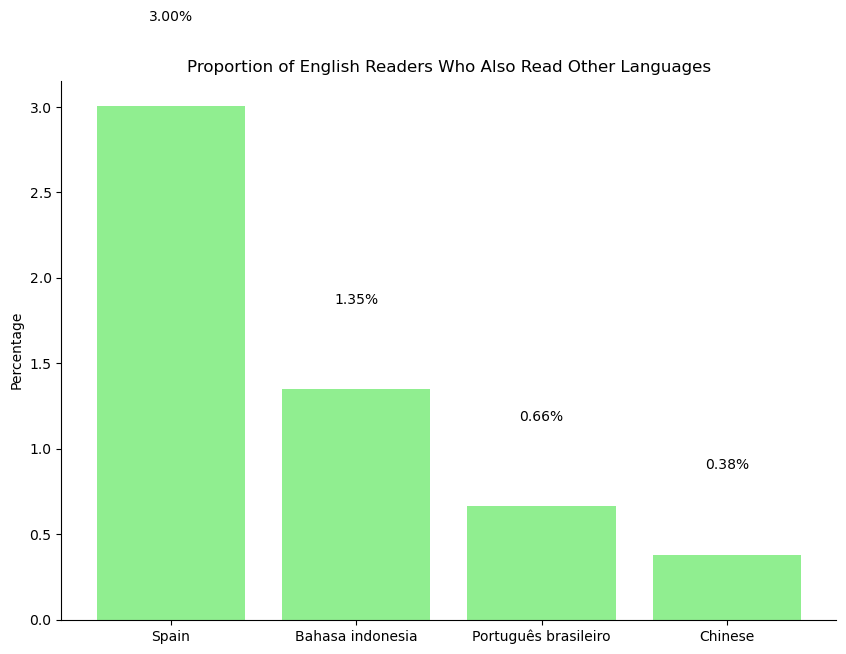

In [53]:
import pandas as pd
import glob
import os
import matplotlib.pyplot as plt

lits = {}


for fn in sorted(glob.glob('/Users/josiechen/desktop/prepared data/*.csv')):

    if 'anglo-norman' in fn:
        continue

    df = pd.read_csv(fn)

    lang = os.path.basename(fn).replace('prepared data_', '').replace('.csv', '').lower()

    lits[lang] = df[['username', 'language', 'work_id']]

all_data = pd.concat(lits.values(), ignore_index=True)

english_readers = all_data[all_data['language'] == 'english']['username'].unique()

english_reader_proportions = {}

other_languages = ['spain', 'Bahasa Indonesia', 'Português brasileiro', 'chinese']

for lang in other_languages:

    other_lang_readers = all_data[(all_data['username'].isin(english_readers)) & (all_data['language'] == lang)]['username'].unique()
    other_lang_readers_count = len(other_lang_readers)
    total_english_readers_count = len(english_readers)
    

    other_lang_readers_percentage = (other_lang_readers_count / total_english_readers_count) * 100
    english_reader_proportions[lang] = other_lang_readers_percentage

    
for lang, percentage in english_reader_proportions.items():
    print(f"Percentage of English readers who also read {lang.capitalize()} articles: {percentage:.2f}%")

    
labels = [lang.capitalize() for lang in other_languages]
sizes = [english_reader_proportions[lang] for lang in other_languages]

fig, ax = plt.subplots(figsize=(10, 7))
ax.bar(labels, sizes, color='lightgreen')
ax.set_ylabel('Percentage')
ax.set_title('Proportion of English Readers Who Also Read Other Languages')

for i in range(len(labels)):
    ax.text(i, sizes[i] + 0.5, f"{sizes[i]:.2f}%", ha='center')

plt.show()


Percentage of Portuguese readers who also read English articles: 36.84%
Percentage of Portuguese readers who also read Spain articles: 11.54%
Percentage of Portuguese readers who also read Bahasa Indonesia articles: 3.90%
Percentage of Portuguese readers who also read Chinese articles: 2.55%


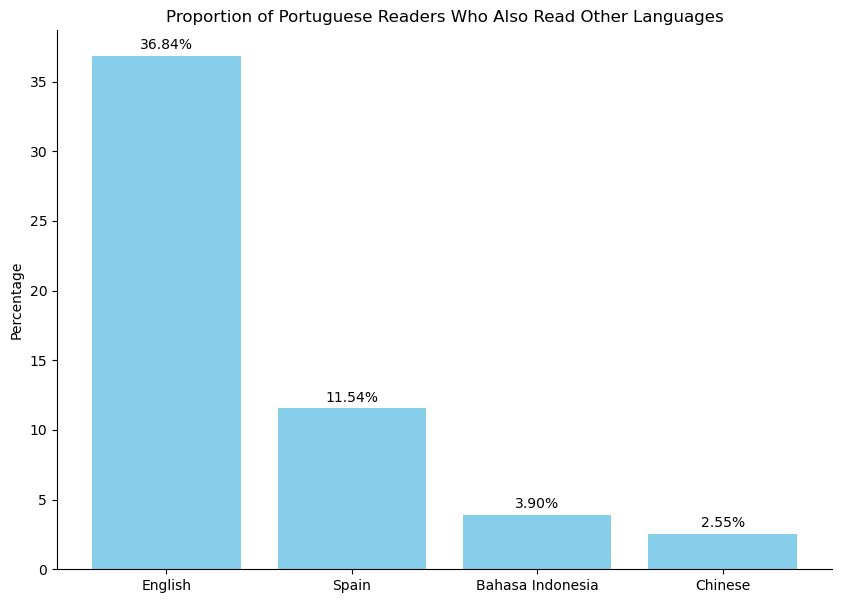

In [48]:
import pandas as pd
import glob
import os
import matplotlib.pyplot as plt

lits = {}


for fn in sorted(glob.glob('/Users/josiechen/desktop/prepared data/*.csv')):

    if 'anglo-norman' in fn:
        continue
    
    df = pd.read_csv(fn)

    lang = os.path.basename(fn).replace('prepared data_', '').replace('.csv', '').lower()

    lits[lang] = df[['username', 'language', 'work_id']]

all_data = pd.concat(lits.values(), ignore_index=True)

portuguese_readers = all_data[all_data['language'] == 'Português brasileiro']['username'].unique()

portuguese_reader_proportions = {}

other_languages = ['english', 'spain', 'Bahasa Indonesia', 'chinese']

for lang in other_languages:

    other_lang_readers = all_data[(all_data['username'].isin(portuguese_readers)) & (all_data['language'] == lang)]['username'].unique()
    other_lang_readers_count = len(other_lang_readers)
    total_portuguese_readers_count = len(portuguese_readers)
    
  
    other_lang_readers_percentage = (other_lang_readers_count / total_portuguese_readers_count) * 100
    portuguese_reader_proportions[lang] = other_lang_readers_percentage


for lang, percentage in portuguese_reader_proportions.items():
    print(f"Percentage of Portuguese readers who also read {lang.replace('_', ' ').title()} articles: {percentage:.2f}%")


labels = [lang.replace('_', ' ').title() for lang in other_languages]
sizes = [portuguese_reader_proportions[lang] for lang in other_languages]

fig, ax = plt.subplots(figsize=(10, 7))
ax.bar(labels, sizes, color='skyblue')
ax.set_ylabel('Percentage')
ax.set_title('Proportion of Portuguese Readers Who Also Read Other Languages')

for i in range(len(labels)):
    ax.text(i, sizes[i] + 0.5, f"{sizes[i]:.2f}%", ha='center')

plt.show()
